In [2]:
#
# Followed from:
# https://becominghuman.ai/simple-neural-network-on-mnist-handwritten-digit-dataset-61e47702ed25
#

import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist

In [3]:
# load MNIST handwritten data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 2s 0us/step


In [5]:
# print out the digit data
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
# print out the target label
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


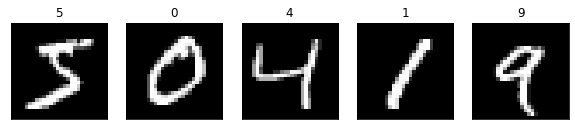

In [7]:
# display first 5 images in dataset
fig, axes = plt.subplots(ncols=5, sharex=False,
                        sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [8]:
# turn labels into on-hot representation
# this is one-hot representation of class with label 3, out of 10 classes
to_categorical(3, num_classes=10)

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [10]:
# now we want to one-hot encode all target labels (y_train and y_test)
# Convert y_train into one-hot format
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)

# Convert y_test into one-hot format
temp = []
for i in range(len(y_test)):
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

In [11]:
# check new shape of y_train and y_test
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [12]:
# we're going to initialize a sequential model for the NN, then add layers
# flatten layer will reshape the 28x28 image into 784 1d values
# connect 784 values into 5 neurons with sigmoid activation function
# can choose any number of neurons
# last add dense layer (with softmax activation func) to act as output, 10 neurons

# Create simple NN model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [13]:
# see details of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 3925      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                60        
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


In [14]:
# compile the NN classifier model
# categorical cross entropy is effective for multiclass classification problems
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])

In [15]:
# now for training the NN, which simply requires the .fit() method
model.fit(X_train, y_train, epochs=5, 
          validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 11s 1ms/step - loss: 1.9305 - acc: 0.3367 - val_loss: 1.1650 - val_acc: 0.6974
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.1146 - acc: 0.6879 - val_loss: 0.9360 - val_acc: 0.7265
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9263 - acc: 0.7255 - val_loss: 0.8614 - val_acc: 0.7577
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8481 - acc: 0.7557 - val_loss: 0.7945 - val_acc: 0.7723
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8180 - acc: 0.7586 - val_loss: 0.7725 - val_acc: 0.7870


In [16]:
# now we can perform predictions using X_test data
# this stores classification probability values for each sample
predictions = model.predict(X_test)
print(predictions)

[[7.98471621e-04 1.04660606e-02 3.04713217e-03 ... 8.77662420e-01
  2.97891675e-03 8.01955611e-02]
 [5.77324769e-03 1.28770610e-02 6.90480530e-01 ... 1.10161409e-03
  3.86608355e-02 2.47763330e-03]
 [5.83249994e-06 9.44234550e-01 1.90630239e-02 ... 1.17473342e-02
  9.40216053e-03 1.16401352e-03]
 ...
 [1.51935162e-03 1.06410701e-02 1.36032524e-02 ... 1.25768427e-02
  1.34915095e-02 8.17244872e-02]
 [2.02554255e-03 5.29895909e-02 3.88004705e-02 ... 1.91883257e-04
  7.11875379e-01 3.24112619e-03]
 [2.53973007e-02 6.54267962e-04 4.95930389e-02 ... 2.20516394e-03
  1.97771005e-03 5.02756285e-03]]


In [17]:
# to find the actual prediction of the model
predictions = np.argmax(predictions, axis=1)
print(predictions)

[7 2 1 ... 4 8 6]


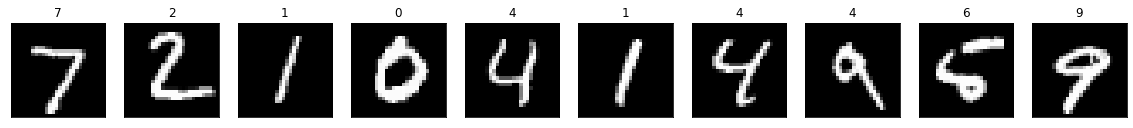

In [19]:
# can also print some images along with the predictions
fig, axes = plt.subplots(ncols=10, sharex=False,
                       sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(predictions[i])
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()